In [47]:
from IPython.display import SVG, display
import tempfile, os

import sys
#sys.path.append('..') # uncomments and adjust if your Boxes.py copy in not in the Python path
from boxes import *

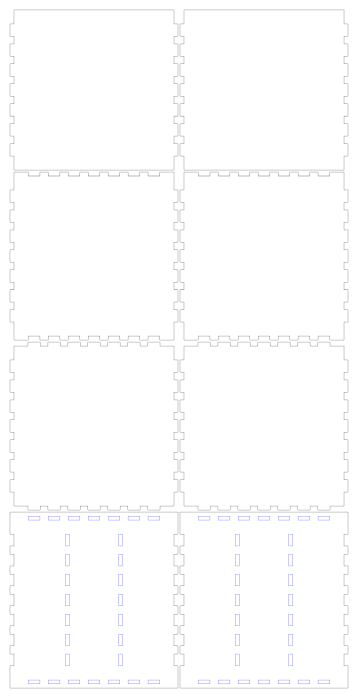

./ModularVent.svg


In [150]:
class ModularVent(Boxes): # Adjust class name and call below
    """Example: Single Shelve to screw to the wall"""

    ui_group = "Shelves" # change for generators belonging in another group
    
    def __init__(self):
        Boxes.__init__(self)
        # arguments
        self.addSettingsArgs(edges.FingerJointSettings, finger=3.0) # arguments for finger joints
        self.buildArgParser(x=150, y=70, h=70)
        self.argparser.add_argument(
            "--module_number", action="store", type=int, default=3,
            help="Amount of slide-in modules")

        
    def render(self):
        x, y, h = self.x, self.y, self.h
        t = self.thickness
        
        # render-magic goes here
        
        hole = lambda: self.hole(self.hole_dist, self.hole_dist, d=self.hole_dia) # use lambda as a callback
        def gen_fingerholes(): 
                N_MODULES = self.module_number
                for i in range(1,N_MODULES+1):
                    x_offset = 0
                    self.fingerHolesAt(x_offset + i*self.x/(N_MODULES+1),0,self.y,90) ##x,y,length,angle

        # Callbacks start in the bottom left corner. 
        self.rectangularWall(x, y, "hFhF", move="", callback=[gen_fingerholes, None,None,None]) # Bottom/top board
        self.rectangularWall(x, y, "hFhF", move="up left", callback=[gen_fingerholes, None,None,None]) 
        self.rectangularWall(x, y, "ffff", move="right ") ## Side boards
        self.rectangularWall(x, y, "ffff", move="up right")
        
        self.rectangularWall(y, h, "FfFf", move="left") ## End boards
        self.rectangularWall(y, h, "FfFf", move="up left")
        for i in range(self.module_number):
            self.rectangularWall(y, h, "efef", move="right") ## Slide in boards
        
b = AfzuigBox()

fn = './ModularVent.svg'
b.parseArgs(['--reference=0', 
             '--thickness=4', 
             '--x=160', 
             '--y=160', 
             '--h=160', 
             '--module_number=2',
             '--burn=0.1',
             '--debug=0', 
             '--output=' + fn])
b.open()
b.render()
b.close()

display(SVG(fn))
print(fn)
